In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from numpy import polyfit, poly1d

# Cryptocurrency Dataset Features
```
date : time of observation
price: price at observation point
market_cap : market capitalization in USD (how much bitcoin/doge are actually worth)
total_volume : volume of transactions on the given day
```
(from https://www.coingecko.com/en/coins/dogecoin/historical_data/usd and https://www.coingecko.com/en/coins/bitcoin/historical_data/usd#panel)

## Bitcoin Dataset

In [22]:
BTC = pd.read_csv (r'btc-usd-max.csv')
BTC.head()

,snapped_at,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [23]:
# view range of bitcoin data
BTC.tail()

,snapped_at,price,market_cap,total_volume
2953,2021-05-31 00:00:00 UTC,35714.752020,6.686643e+11,3.065027e+10
2954,2021-06-01 00:00:00 UTC,37340.679266,6.991386e+11,3.795080e+10
2955,2021-06-02 00:00:00 UTC,36680.068202,6.887264e+11,3.353691e+10
2956,2021-06-03 00:00:00 UTC,37685.717982,7.045313e+11,3.124069e+10
2957,2021-06-04 00:00:00 UTC,39151.316184,7.331507e+11,3.339672e+10


In [24]:
# rename snapped_at to date
BTC = BTC.rename(columns={'snapped_at':'date'})
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28 00:00:00 UTC,135.30,1.500518e+09,0.0
1,2013-04-29 00:00:00 UTC,141.96,1.575032e+09,0.0
2,2013-04-30 00:00:00 UTC,135.30,1.501657e+09,0.0
3,2013-05-01 00:00:00 UTC,117.00,1.298952e+09,0.0
4,2013-05-02 00:00:00 UTC,103.43,1.148668e+09,0.0


In [25]:
# strip string in snapped_at to remove time
BTC['date'] = BTC['date'].str.split(' ', expand=True)[0]
BTC.head()

,date,price,market_cap,total_volume
0,2013-04-28,135.30,1.500518e+09,0.0
1,2013-04-29,141.96,1.575032e+09,0.0
2,2013-04-30,135.30,1.501657e+09,0.0
3,2013-05-01,117.00,1.298952e+09,0.0
4,2013-05-02,103.43,1.148668e+09,0.0


Text(0.5, 1.0, 'Bitcoin Price over Time')

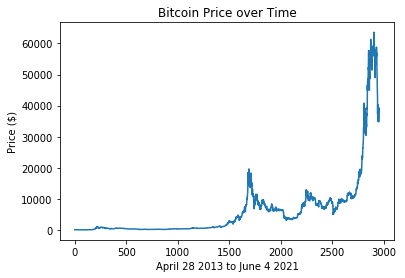

In [47]:
# using indices as dates
x =BTC.index
b_price=BTC.price
x_label = 'April 28 2013 to June 4 2021'

plt.plot(x, b_price)
plt.xlabel(x_label)
plt.ylabel('Price ($)')
plt.title('Bitcoin Price over Time')

Text(0.5, 1.0, 'Bitcoin Market Cap over Time')

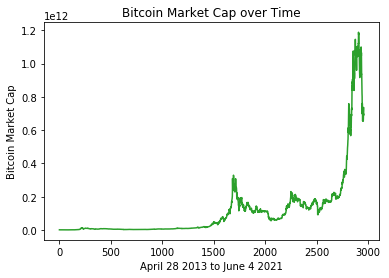

In [27]:
b_cap= BTC.market_cap

plt.plot(x, b_cap, 'tab:green')
plt.xlabel(x_label)
plt.ylabel('Bitcoin Market Cap')
plt.title('Bitcoin Market Cap over Time')

Text(0.5, 1.0, 'Bitcoin Total Volume over Time')

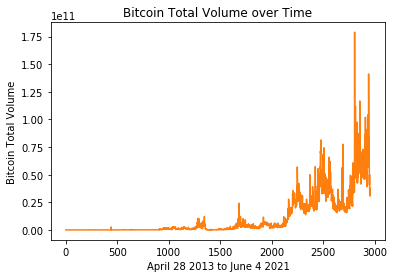

In [28]:
b_volume = BTC.total_volume

plt.plot(x, b_volume, 'tab:orange')
plt.xlabel(x_label)
plt.ylabel('Bitcoin Total Volume')
plt.title('Bitcoin Total Volume over Time')

## Doge Dataset

In [29]:
DOGE = pd.read_csv (r'doge-usd-max.csv')
DOGE.head()

,snapped_at,price,market_cap,total_volume
0,2013-12-15 00:00:00 UTC,0.000559,3488670.0,0.0
1,2013-12-17 00:00:00 UTC,0.000218,1619159.0,0.0
2,2013-12-18 00:00:00 UTC,0.000268,2191987.0,0.0
3,2013-12-19 00:00:00 UTC,0.000475,4299422.0,0.0
4,2013-12-20 00:00:00 UTC,0.000989,9866232.0,0.0


In [30]:
# rename snapped_at to date
DOGE = DOGE.rename(columns={'snapped_at':'date'})
# strip string in snapped_at to remove time
DOGE['date'] = DOGE['date'].str.split(' ', expand=True)[0]
DOGE.head()

,date,price,market_cap,total_volume
0,2013-12-15,0.000559,3488670.0,0.0
1,2013-12-17,0.000218,1619159.0,0.0
2,2013-12-18,0.000268,2191987.0,0.0
3,2013-12-19,0.000475,4299422.0,0.0
4,2013-12-20,0.000989,9866232.0,0.0


In [31]:
DOGE.tail()

,date,price,market_cap,total_volume
2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


Text(0.5, 1.0, 'DOGE Price over Time')

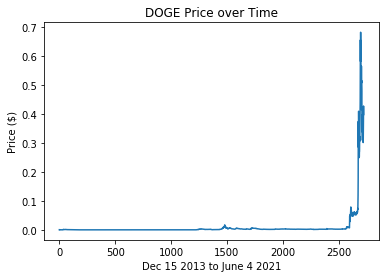

In [46]:
# using indices in replace of dates
x2=DOGE.index
x2_label = 'Dec 15 2013 to June 4 2021'

plt.plot(x2,DOGE.price)
plt.xlabel(x2_label)
plt.ylabel('Price ($)')
plt.title('DOGE Price over Time')

#### since there hasn't been much fluctuation in Doge for the first 2500 observation points, we can just plot graph when price is >= 0.01


In [33]:
doge = DOGE.iloc[2609:,:]
doge

,date,price,market_cap,total_volume
2609,2021-02-08,0.079085,1.027107e+10,1.379313e+10
2610,2021-02-09,0.079227,1.016402e+10,1.082381e+10
2611,2021-02-10,0.069977,8.978311e+09,6.181135e+09
2612,2021-02-11,0.072987,9.381046e+09,6.304019e+09
2613,2021-02-12,0.069755,8.951729e+09,3.377206e+09
2614,2021-02-13,0.069475,8.937648e+09,3.548414e+09
2615,2021-02-14,0.066874,8.583843e+09,2.275048e+09
2616,2021-02-15,0.062034,7.963525e+09,3.318278e+09
2617,2021-02-16,0.056912,7.306726e+09,4.042454e+09
2618,2021-02-17,0.054080,6.943871e+09,2.717472e+09


In [34]:
doge = doge.reset_index()
doge

,index,date,price,market_cap,total_volume
0,2609,2021-02-08,0.079085,1.027107e+10,1.379313e+10
1,2610,2021-02-09,0.079227,1.016402e+10,1.082381e+10
2,2611,2021-02-10,0.069977,8.978311e+09,6.181135e+09
3,2612,2021-02-11,0.072987,9.381046e+09,6.304019e+09
4,2613,2021-02-12,0.069755,8.951729e+09,3.377206e+09
5,2614,2021-02-13,0.069475,8.937648e+09,3.548414e+09
6,2615,2021-02-14,0.066874,8.583843e+09,2.275048e+09
7,2616,2021-02-15,0.062034,7.963525e+09,3.318278e+09
8,2617,2021-02-16,0.056912,7.306726e+09,4.042454e+09
9,2618,2021-02-17,0.054080,6.943871e+09,2.717472e+09


In [35]:
start = doge.date.iloc[0]
end = doge.date.iloc[-1]

In [36]:
doge.tail()

,index,date,price,market_cap,total_volume
112,2721,2021-05-31,0.301429,3.912353e+10,2.927396e+09
113,2722,2021-06-01,0.326531,4.239246e+10,2.987099e+09
114,2723,2021-06-02,0.373237,4.846133e+10,6.733328e+09
115,2724,2021-06-03,0.427388,5.545456e+10,1.239040e+10
116,2725,2021-06-04,0.398007,5.168848e+10,7.531474e+09


Text(0.5, 1.0, 'DOGE Price over Time')

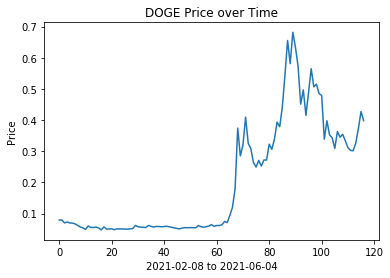

In [37]:
doge_x2 = doge.index
d_price =doge.price

x2_label = start + ' to ' + end
plt.plot(doge_x2, d_price)
plt.xlabel(x2_label)
plt.ylabel('Price')
plt.title('DOGE Price over Time')

Text(0.5, 1.0, 'DOGE Market Cap over Time')

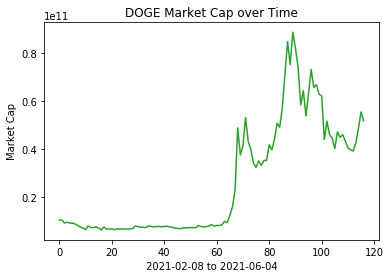

In [38]:
d_cap =doge.market_cap

plt.plot(doge_x2, d_cap, 'tab:green')
plt.xlabel(x2_label)
plt.ylabel('Market Cap')
plt.title('DOGE Market Cap over Time')

Text(0.5, 1.0, 'DOGE Total Volume over Time')

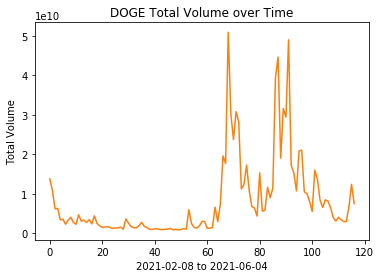

In [39]:
d_volume =doge.total_volume

plt.plot(doge_x2, d_volume,'tab:orange')
plt.xlabel(x2_label)
plt.ylabel('Total Volume')
plt.title('DOGE Total Volume over Time')

# Model Selection: Multiple Polynomial Regression
Goal: select the model with the lowest cross-validated test MSE (mean squared error) to balance bias/variance and prevent overfitting

> $CV_k = \frac{1}{k} \sum_{i=1}^{k} MSE_i$

## Leave-one-out cross-validation (LOOCV)
- Choose 1 data point to use for validation/test & train remaining (n-1) observations
- Repeat n times using a different observation point as the test each time
- Same as K-Fold when k=n

In [48]:
#use sklearn
from sklearn.model_selection import KFold

In [65]:
# cross-validation method returns the test MSE and the model with the lowest test MSE
def cv(deg, k, dataset):
    kf = KFold(n_splits = k, shuffle = True, random_state = 0)
    mse = []
    models = []

    for train_i, val_i in kf.split(dataset):

        # y value used to fit polynomial model
        y = dataset.iloc[train_i,:].price

        # step 1: train model with baseline model
        model = poly1d(polyfit(train_i, y, deg = deg))
        models.append(model)

        # step 2: fit test observation point to polynomial 
        yhat = model(val_i)

        # step 3: append MSEs`
        diffsq = (y-yhat)**2
        mse.append(np.mean(diffsq))
        
    # find the model with the lowest mse
    min_index = np.argmin(mse)

    return mse[min_index], models[min_index]

In [66]:
# create polynomial model for a range of degrees from 1 to 10
mse_min = []
model_min = []
for deg in range(1, 11):
    # k = n for loocv
    k = len(doge)
    mse, model = cv(deg, k, doge)

    mse_min.append(mse)
    model_min.append(model)

Polynomial degree with the lowest test MSE: 3


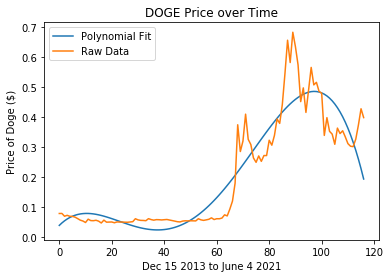

In [70]:
# find index of lowest mse out of all the polynomial degrees
index = np.argmin(mse_min)

# find the polynomial model with the lowest test mse 
best_model = model_min[index]
print("Polynomial degree with the lowest test MSE: %d" % index)

# price of doge from the best polynomial degree model
y_model = best_model(range(len(doge)))

plt.plot(doge_x2, y_model, label="Polynomial Fit")
plt.xlabel(x2_label)
plt.ylabel('Price of Doge ($)')

# plot original price of Doge
plt.plot(doge_x2, d_price, label="Raw Data")
plt.xlabel(x2_label)
plt.title('DOGE Price over Time')

plt.legend()

In [60]:
model_min[index]

poly1d([-5.70870825e-08,  1.10424808e-05, -5.76178277e-04,  8.68567277e-03,
        3.95411277e-02])

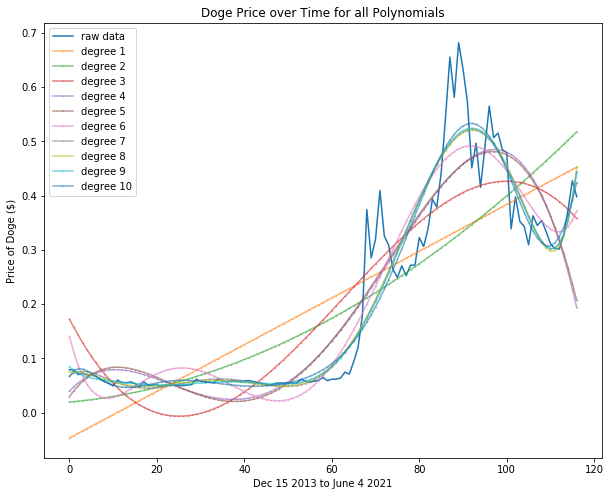

In [98]:
# plot models of all the polynomial degrees
plt.figure(figsize=(10,8))
plt.plot(doge_x2, d_price, label="raw data")

for x in range(len(model_min)):
    m = model_min[x]
    y_doge = m(range(len(doge)))
    
    plt.plot(doge_x2, y_doge, '-o',markersize=0.4, label='degree %s' % (x+1), alpha=0.6)
    plt.xlabel(x2_label)
    plt.ylabel('Price of Doge ($)')
    plt.title('Doge Price over Time for all Polynomials')
    plt.legend()

## k-Fold cross-validation
- Randomly assign each data point to one of k data subsets/folds
- Choose one fold as test set & train remaining (k-1) folds
- Same as LOOCV when k=n

In [ ]:
k = len(doge)

kf = KFold(n_splits = k, shuffle = True, random_state = 0)
# mse for baseline model with an intercept
mse_kfold = []

for train_i, val_i in kf.split(doge):
    
    # y value used to fit polynomial model
    y = BTC.iloc[train_i,:].price
    
    # step 1: train model with baseline model
    model = poly1d(polyfit(train_i, y, deg = 4))
    
    # step 2: fit test observation point to polynomial 
    yhat = model(val_i)
    
    # step 3: append MSEs
    diffsq = (y-yhat)**2
    mse_kfold.append(np.mean(diffsq))
    
len(mse_fold)

# Model Estimation
* can get confidence intervals and show standard error bars